In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aaa = datasets.cifar10
(train_a, train_l), (test_a, test_l) = aaa.load_data()

In [4]:
print(train_a[0])
print(train_a[0].shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


In [ ]:
train_a.shape

In [4]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import os, glob, numpy as np
from sklearn.model_selection import train_test_split


caltech_dir1 = "C:\\Users\\student\\Desktop\\eat_insta\\eat_insta"
caltech_dir2 = "C:\\Users\\student\\Desktop\\cat_insta\\cat_insta"
caltech_dir3 = "C:\\Users\\student\\Desktop\\cloth_insta\\cloth_insta"

categories = ["eat", "cat", "cloth"]
nb_classes = len(categories)

image_w = 32
image_h = 32

pixels = image_h * image_w * 3

X = []
y = []



for i, val in enumerate([caltech_dir1, caltech_dir2, caltech_dir3]):
    print(val)
    #one-hot 돌리기.
    label = [0,0,0]
    label[i] = 1

    files = glob.glob(val +"/*.png")
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img) / 255

        X.append(data)
        y.append(label)

        
        if i % 700 == 0:
            print(i)

X = np.array(X)
y = np.array(y)

C:\Users\student\Desktop\eat_insta\eat_insta
0
700
1400
2100
2800
3500
4200
4900
5600
6300
7000
7700
8400
9100
9800
C:\Users\student\Desktop\cat_insta\cat_insta
0
700
1400
2100
2800
3500
4200
4900
5600
6300
7000
7700
8400
9100
9800
C:\Users\student\Desktop\cloth_insta\cloth_insta
0
700
1400
2100
2800
3500
4200
4900
5600
6300
7000
7700
8400
9100
9800


In [5]:
print(X[0])
print(X[0].shape)
print(len(X))
print(len(y))

[[[0.2        0.23921569 0.24705882]
  [0.2        0.23921569 0.24705882]
  [0.19215686 0.23137255 0.23921569]
  ...
  [0.24705882 0.28627451 0.32156863]
  [0.23529412 0.27843137 0.30196078]
  [0.21176471 0.24705882 0.26666667]]

 [[0.20392157 0.23529412 0.24705882]
  [0.20392157 0.23529412 0.24705882]
  [0.20392157 0.24313725 0.25098039]
  ...
  [0.25882353 0.29803922 0.33333333]
  [0.25490196 0.30588235 0.32941176]
  [0.25098039 0.29411765 0.31764706]]

 [[0.18823529 0.22745098 0.23529412]
  [0.19607843 0.23529412 0.24313725]
  [0.20784314 0.24705882 0.25490196]
  ...
  [0.25882353 0.30980392 0.34117647]
  [0.25098039 0.30196078 0.33333333]
  [0.22352941 0.29019608 0.31764706]]

 ...

 [[0.53333333 0.57647059 0.55294118]
  [0.50980392 0.53333333 0.5254902 ]
  [0.15686275 0.19215686 0.18823529]
  ...
  [0.84313725 0.88235294 0.87843137]
  [0.8745098  0.91372549 0.92156863]
  [0.88235294 0.92156863 0.92941176]]

 [[0.59215686 0.63529412 0.61176471]
  [0.58039216 0.62352941 0.6       ]


In [7]:
batch_size = 64
num_classes = 3
epochs = 35

In [12]:
model = keras.Sequential([
    Conv2D(32, kernel_size = (3, 3), padding = 'same', input_shape = X.shape[1:], activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size = (3, 3), padding = 'same', activation = tf.nn.relu),
    MaxPooling2D(pool_size = (2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation = tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [13]:
# 모델 컴파일

model.compile(
    loss = 'categorical_crossentropy',
    opimizer = 'adam',
    metrics = ['accuracy']
)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# 과대적합을 막기위한 설정
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), shuffle = True, callbacks = [early_stopping])

Train on 22500 samples, validate on 7501 samples
Epoch 1/35
22500/22500 [==============================] - 27s 1ms/sample - loss: 0.8935 - accuracy: 0.5950 - val_loss: 0.8529 - val_accuracy: 0.6115
Epoch 2/35
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.7532 - accuracy: 0.6873 - val_loss: 0.7067 - val_accuracy: 0.7295
Epoch 3/35
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.6816 - accuracy: 0.7222 - val_loss: 0.6379 - val_accuracy: 0.7508
Epoch 4/35
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.6372 - accuracy: 0.7502 - val_loss: 0.6372 - val_accuracy: 0.7492
Epoch 5/35
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.6015 - accuracy: 0.7646 - val_loss: 0.6861 - val_accuracy: 0.7576
Epoch 6/35
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.5746 - accuracy: 0.7763 - val_loss: 0.7607 - val_accuracy: 0.6712
Epoch 7/35
22500/22500 [==============================] -

In [51]:
# 평가
loss_f, acc_f = model.evaluate(X_test, y_test)
print('\nLoss : {} Acc : {}'.format(loss, acc))

7501/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Loss : 0.5623399544486903 Acc : 0.7778962850570679


In [47]:
history.history['acc']

KeyError: 'acc'

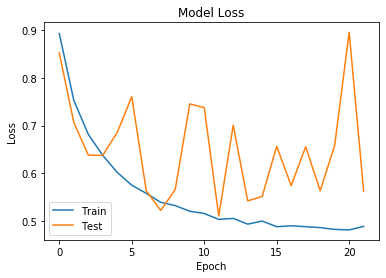

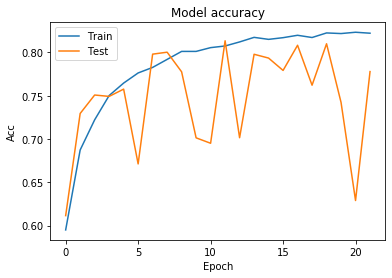

In [53]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Acc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
plt_show_loss(history)
plt.show()

plt_show_acc(history)
plt.show()

In [37]:
# 모델 저장하기
from keras.models import load_model
model.save('cnn_insta_fit.h5')

Using TensorFlow backend.


In [54]:
predictions = model.predict(X_test)

In [60]:
predictions

array([[0.26875097, 0.4116565 , 0.3195925 ],
       [0.25888124, 0.5935727 , 0.14754607],
       [0.26105884, 0.227105  , 0.5118362 ],
       ...,
       [0.3016352 , 0.54921275, 0.14915207],
       [0.00739306, 0.00189796, 0.99070895],
       [0.02508501, 0.9485167 , 0.02639828]], dtype=float32)

In [65]:
predictions_array

NameError: name 'predictions_array' is not defined

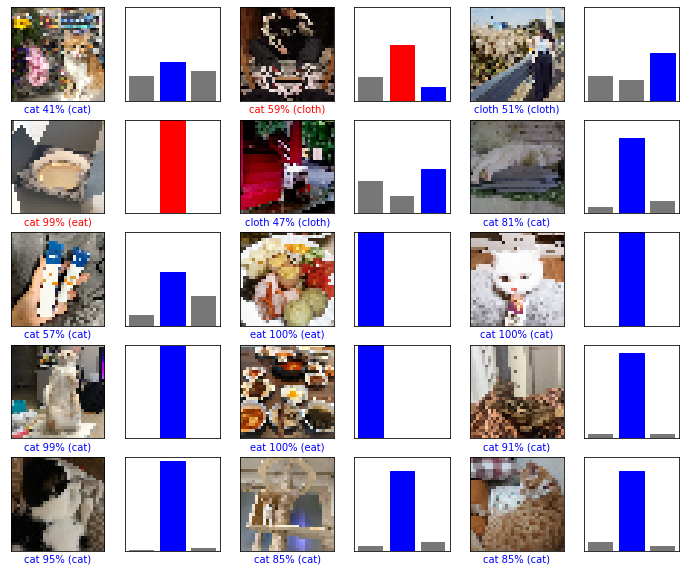

In [66]:
class_names = ["eat", "cat", "cloth"]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)]),
               color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')
        
        
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)

    
plt.show()